In [67]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
!pip install opencv-python

# Бахруст, помоги!
# Женя, помоги!
# Николай, не бей!


In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")

In [71]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ShitDataSet/abstractShit.csv")

In [72]:
df

,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9,noise10,index
0,0.752762,0.840167,0.813774,0.895041,0.580899,0.828996,0.165480,0.036337,0.917260,0.104346,0
1,0.649276,0.966732,0.889025,0.571937,0.459980,0.799779,0.887552,0.116744,0.047999,0.303830,1
2,0.376258,0.632335,0.562730,0.718512,0.729192,0.520255,0.676406,0.865210,0.512767,0.640314,2
3,0.784189,0.463049,0.370980,0.565431,0.214216,0.927326,0.931868,0.231770,0.325804,0.507366,3
4,0.131598,0.891972,0.172477,0.478149,0.592806,0.985392,0.336361,0.314019,0.025780,0.020378,4
...,...,...,...,...,...,...,...,...,...,...,...
8141,0.576848,0.838080,0.168181,0.447704,0.383133,0.757795,0.789099,0.271790,0.749079,0.897864,8141
8142,0.259268,0.182666,0.611220,0.733857,0.600172,0.329364,0.984901,0.846182,0.110852,0.741468,8142
8143,0.544562,0.457280,0.769580,0.901178,0.980113,0.844832,0.026393,0.522219,0.388534,0.953474,8143
8144,0.064203,0.669408,0.020010,0.128775,0.028357,0.356248,0.265406,0.571937,0.524061,0.987356,8144


In [73]:
df = df.drop(columns="index")

In [74]:
df.head()

,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9,noise10
0,0.752762,0.840167,0.813774,0.895041,0.580899,0.828996,0.165480,0.036337,0.917260,0.104346
1,0.649276,0.966732,0.889025,0.571937,0.459980,0.799779,0.887552,0.116744,0.047999,0.303830
2,0.376258,0.632335,0.562730,0.718512,0.729192,0.520255,0.676406,0.865210,0.512767,0.640314
3,0.784189,0.463049,0.370980,0.565431,0.214216,0.927326,0.931868,0.231770,0.325804,0.507366
4,0.131598,0.891972,0.172477,0.478149,0.592806,0.985392,0.336361,0.314019,0.025780,0.020378


In [75]:
type(df)

pandas.core.frame.DataFrame

In [76]:
df.shape

(8146, 10)

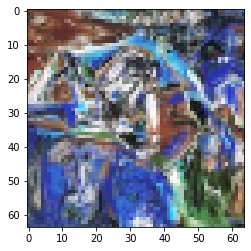

In [145]:
a = cv2.resize(cv2.imread(f'/content/gdrive/MyDrive/Colab Notebooks/ShitDataSet/abstract_art_512/2.jpg'), (64, 64))

plt.figure()
plt.imshow(a)

In [77]:
xs = []
ys = []
for i,row in df.iloc[1:].iterrows():
  xs.append(row.iloc[:][:10])
  ys.append(cv2.resize(cv2.imread(f'/content/gdrive/MyDrive/Colab Notebooks/ShitDataSet/abstract_art_512/{i}.jpg'), (64, 64)))
  print(i)

Выходные данные были обрезаны до нескольких последних строк (5000).
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
33

In [99]:
X_train = torch.FloatTensor(xs)
y_train = torch.FloatTensor(ys)

X_train = X_train.to(device)
y_train = y_train.to(device) 


X_train_copy = X_train
y_train_copy = y_train

In [79]:
X_train.shape

torch.Size([8145, 10])

In [100]:
X_train = X_train.unsqueeze(-1).unsqueeze(-1)#.unsqueeze(-1)

In [81]:
X_train.shape

torch.Size([8145, 10, 1, 1])

In [121]:
y_train = y_train/255

In [129]:
y_train = y_train * 2 - 1

In [106]:
y_train = y_train.permute(0,3,1,2)

In [83]:
X_train.shape, y_train.shape

(torch.Size([8145, 10, 1, 1]), torch.Size([8145, 3, 64, 64]))

In [107]:
y_train.shape

torch.Size([8145, 3, 64, 64])

In [130]:
class ShitNet(torch.nn.Module):
    def __init__(self,n_inputs_neurons):
      super().__init__()
      self.encoder = nn.Sequential(
        #nn.Conv2d(n_inputs_neurons,n_hidden_neurons,1),
        nn.Conv2d(3, 64, 4, 3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 256, 4, 3, 2),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(256,512, 4, 2, 1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(512,n_inputs_neurons, 4, 1, 0),
        nn.Tanh())  
        
        
      self.decoder = nn.Sequential(
        #nn.Conv2d(n_inputs_neurons,n_hidden_neurons,1),
        nn.ConvTranspose2d(n_inputs_neurons, 512, 4, 1, 0),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.ConvTranspose2d(512, 256, 4, 2, 1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.ConvTranspose2d(256, 64, 4, 3, 2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.ConvTranspose2d(64, 3, 4, 3),
        nn.Tanh())
    def forward(self,x):
      x = self.decoder(self.encoder(x))
      return x
shitNet = ShitNet(10)
shitNet.to(device)

ShitNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 256, kernel_size=(4, 4), stride=(3, 3), padding=(2, 2))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(512, 10, kernel_size=(4, 4), stride=(1, 1))
    (10): Tanh()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(10, 512, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_r

In [95]:
loss = torch.nn.MSELoss()

In [131]:
preds = shitNet.forward(y_train[1:2]) 
preds.shape

torch.Size([1, 3, 64, 64])

In [132]:
X_train.shape

torch.Size([8145, 10, 1, 1])

In [133]:
optimizer = torch.optim.Adam(shitNet.parameters(), lr=0.00001)

In [114]:
batch_size = 256

In [134]:
loss_history = []

In [158]:
shitNet.train()

for epoch in range(30):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = shitNet.forward(y_batch) 
        #print(y_batch.shape,preds.shape)     
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    preds = shitNet.forward(y_batch) 
    loss_train_value = loss(preds, y_batch)

    print(f"Epoch {epoch}; loss {loss_train_value}")
torch.save(shitNet, "/content/gdrive/MyDrive/Colab Notebooks/ShitDataSet/shit.nn")

Epoch 0; loss 0.10574205964803696
Epoch 1; loss 0.10834768414497375
Epoch 2; loss 0.0958341732621193
Epoch 3; loss 0.10514898598194122
Epoch 4; loss 0.10087330639362335
Epoch 5; loss 0.09261950850486755
Epoch 6; loss 0.10729166120290756
Epoch 7; loss 0.1030207946896553
Epoch 8; loss 0.10053307563066483
Epoch 9; loss 0.09857553243637085
Epoch 10; loss 0.09602564573287964
Epoch 11; loss 0.09454867243766785
Epoch 12; loss 0.10548333823680878
Epoch 13; loss 0.1018640547990799
Epoch 14; loss 0.0971192941069603
Epoch 15; loss 0.0947502925992012
Epoch 16; loss 0.08984783291816711
Epoch 17; loss 0.0896390900015831
Epoch 18; loss 0.09686391055583954
Epoch 19; loss 0.08800113201141357
Epoch 20; loss 0.09236853569746017
Epoch 21; loss 0.10156741738319397
Epoch 22; loss 0.09175555408000946
Epoch 23; loss 0.08720622956752777
Epoch 24; loss 0.09340058267116547
Epoch 25; loss 0.08694981038570404
Epoch 26; loss 0.09185580909252167
Epoch 27; loss 0.09487790614366531
Epoch 28; loss 0.08500867336988449
E

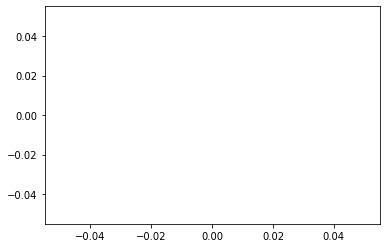

In [117]:
plt.plot(loss_history)

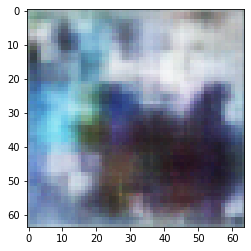

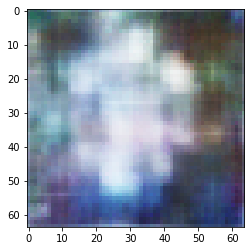

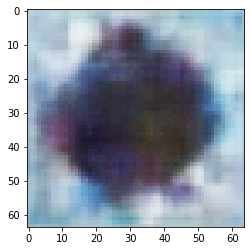

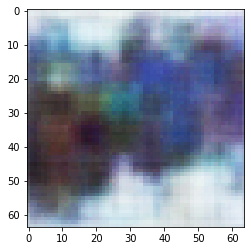

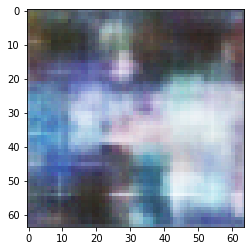

In [159]:
for index in range(5):
    img = shitNet.forward(y_train[index:index+1]) / 2 + 0.5
    img = img.permute(0,2,3,1)
    #print(img)
    plt.figure()
    plt.imshow(img[0].cpu().detach().numpy())

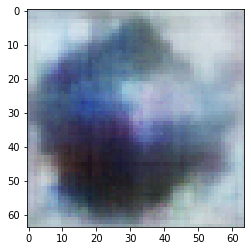

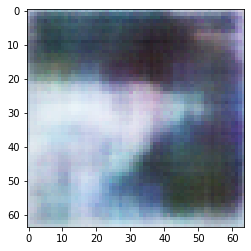

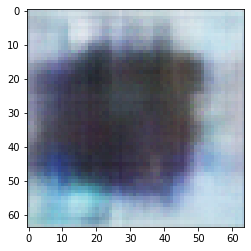

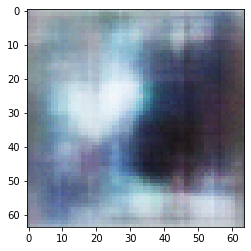

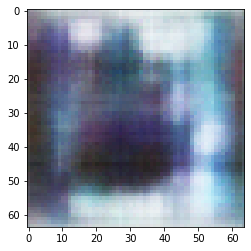

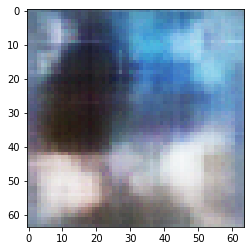

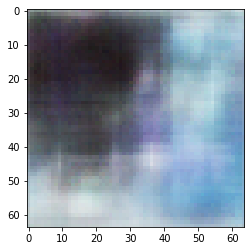

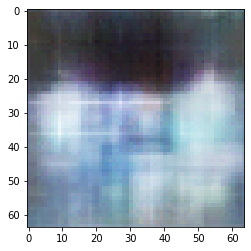

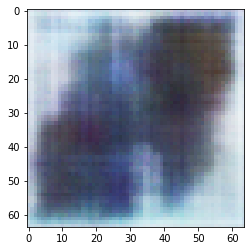

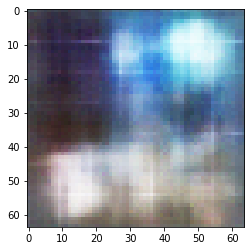

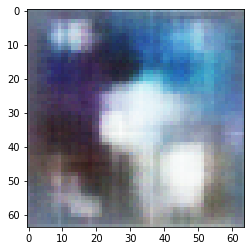

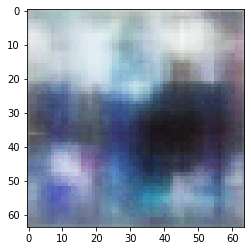

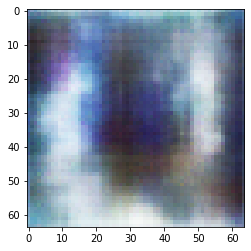

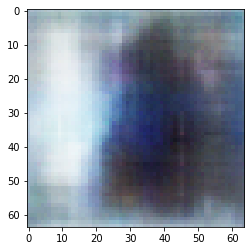

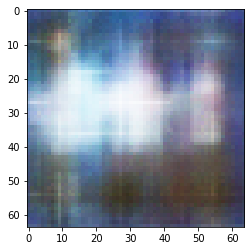

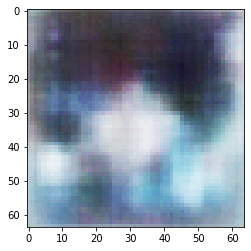

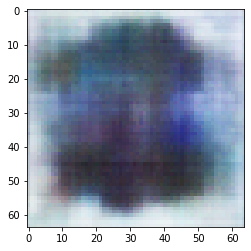

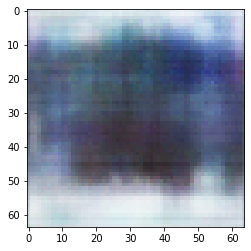

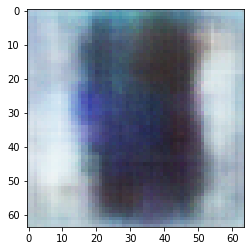

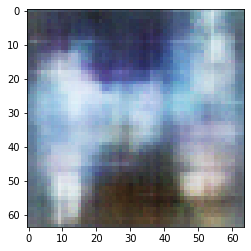

In [157]:
import random
for index in random.sample(range(len(X_train)), 20):
    img = shitNet.decoder(X_train[index:index+1] * 2 - 1) / 2 + 0.5
    img = img.permute(0,2,3,1)
    #print(img)
    plt.figure()
    plt.imshow(img[0].cpu().detach().numpy())

In [ ]:
plt.imshow(img[0].detach().numpy())

In [ ]:
!nvidia-smi